In [78]:
# Import packages needed for Part 1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Define the probability density function f(x)
def f(x):
    return 0.5 * np.exp(-np.abs(x))

In [80]:
# Create a Random Walk Metropolis Algorithm to generate samples and f(x) values
def metropolis_algorithm(N, x0, s):
    # Initialize an array to store the generated samples
    values = np.zeros(N + 1)
    values[0] = x0

    # Iterate over the number of samples
    for i in range(1, N + 1):
        # Simulate a random number from the normal distribution
        x_star = np.random.normal(values[i - 1], s)
        
        # Compute the acceptance ratio
        ratio = f(x_star) / f(values[i - 1])
        
        # Generate a random number from the uniform distribution
        u = np.random.uniform(0, 1)
        
        # Accept or reject the proposal
        if u < ratio:
            values[i] = x_star
        else:
            values[i] = values[i - 1]

    return values

Part 1a

In [82]:
# Parameters
x0 = 0  # Initial value
N = 10000  # Number of samples
s = 1  # Standard deviation of the proposal distribution

In [83]:
# Generate samples using Random Walk Metropolis Algorithm
samples = metropolis_algorithm(N, x0, s)

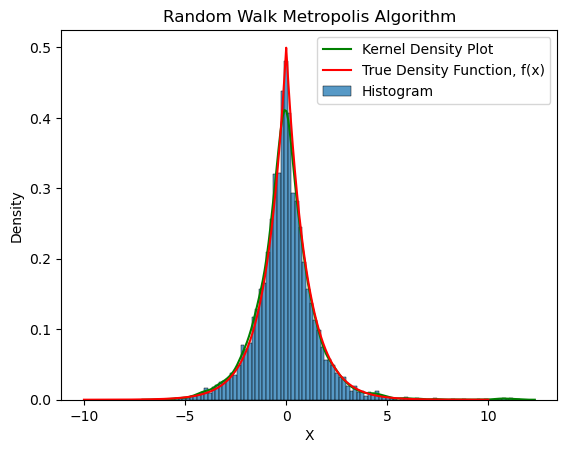

Sample Mean: -0.025099654912062997
Sample Standard Deviation: 1.5179181153025416


In [84]:
# Plot histogram and kernel density plot
sns.histplot(samples, bins = 100, edgecolor = 'black', label = 'Histogram', stat = 'density')
sns.kdeplot(samples, color = 'green', label = 'Kernel Density Plot')
plt.plot(np.linspace(-10, 10, N), f(np.linspace(-10, 10, N)), color='red', label = 'True Density Function, f(x)')
plt.title('Random Walk Metropolis Algorithm')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()

# Finding the mean and standard deviation of all the x values generated
mean = np.mean(samples)
std = np.std(samples)
print("Sample Mean:", mean)
print("Sample Standard Deviation:", std)

Part 1b

In [86]:
# Create a function to calculate the R hat value
def calc_R(N, x0_values, s):
    J = len(x0_values)
    Mj = np.zeros(J)
    Vj = np.zeros(J)

    for j, x0 in enumerate(x0_values):
        samples = metropolis_algorithm(N, x0, s)
        Mj[j] = np.mean(samples)
        Vj[j] = np.var(samples)

    M = np.mean(Mj)
    W = np.mean(Vj)
    B = 1 / J * np.sum((Mj - M)**2)
    
    R = np.sqrt((W + B) / W)
    
    return R

In [87]:
# Parameters
N = 2000
s_values = np.linspace(0.001, 1, 1000)
J = 4
x0_values = [0.1, 0.5, 1.0, 2.0] # Different initial values for x0

In [88]:
# Compute R hat values for different s values
Rhat_values = []
for s in s_values:
    Rhat = calc_R(N, x0_values, s)
    if Rhat < 2.5:  # Only consider R hat values less than 2.5
        Rhat_values.append(Rhat)
    else:
        Rhat_values.append(np.nan)  # Replace R hat >= 2.5 with NaN for plotting

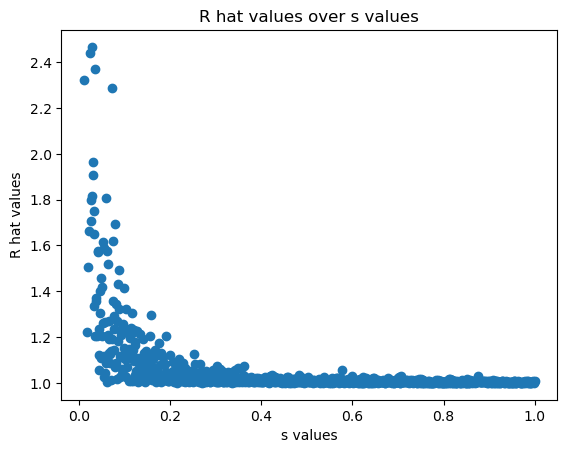

In [89]:
# Plot R hat values over s values
plt.scatter(s_values, Rhat_values)
plt.xlabel('s values')
plt.ylabel('R hat values')
plt.title('R hat values over s values')
plt.show()